In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
qf_model_embedding_dim = [2500, 2025, 1600, 1225, 900, 625]
qf_model_parameters = [175.107388, 141.844238, 112.082388, 85.821838, 63.062588, 43.804638]
qf_model_training_time = [978.54, 1078.34, 1039.94, 790.37, 756.91, 553.62]
qf_model_perplexity = [1980.847, 2323.198, 1707.246, 2209.591, 2157.990, 2527.571]
qf_model_embedding_dim.reverse()
qf_model_parameters.reverse()
qf_model_training_time.reverse()
qf_model_perplexity.reverse()

In [3]:
gpt_model_embedding_dim = [2500, 2025, 1600, 1225, 900, 625]
gpt_model_parameters = [1372.459388, 927.018638, 601.906388, 372.642638, 217.627388, 118.140638]
gpt_model_training_time = [8660.09, 6562.86, 4185.80, 2810.02, 1796.34, 1084.82]
gpt_model_perplexity = [1711.065, 2111.638, 2677.740, 2461.813, 777.236, 1248.349]
gpt_model_embedding_dim.reverse()
gpt_model_parameters.reverse()
gpt_model_training_time.reverse()
gpt_model_perplexity.reverse()

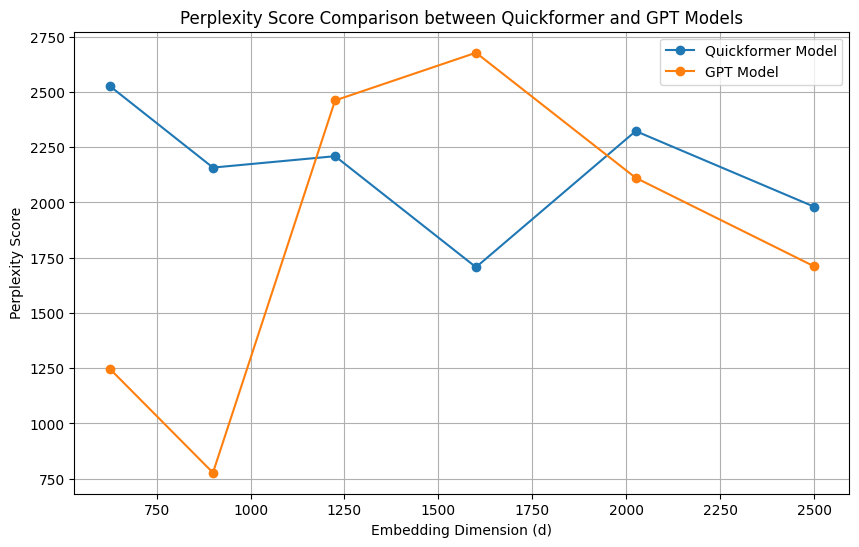

In [30]:
# Perplexity comparison
plt.figure(figsize=(10, 6))
plt.plot(qf_model_embedding_dim, qf_model_perplexity, label='Quickformer Model', marker='o')
plt.plot(gpt_model_embedding_dim, gpt_model_perplexity, label='GPT Model', marker='o')
plt.xlabel('Embedding Dimension (d)')
plt.ylabel('Perplexity Score')
plt.title('Perplexity Score Comparison between Quickformer and GPT Models')
plt.legend()
plt.grid(True)
# plt.savefig('perplexity_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

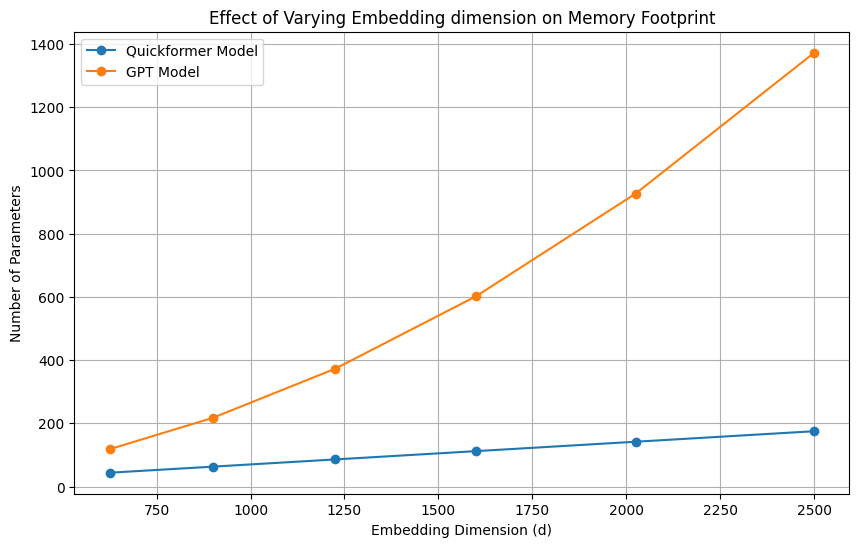

In [31]:
# Effect of varying embedding dimension d on memory footpring of both models
# Quickformer Model
plt.figure(figsize=(10, 6))
plt.plot(qf_model_embedding_dim, qf_model_parameters, label='Quickformer Model', marker='o')
plt.plot(gpt_model_embedding_dim, gpt_model_parameters, label='GPT Model', marker='o')
plt.xlabel('Embedding Dimension (d)')
plt.ylabel('Number of Parameters')
plt.title('Effect of Varying Embedding dimension on Memory Footprint')
plt.legend()
plt.grid(True)
# plt.savefig('memory_footprint_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

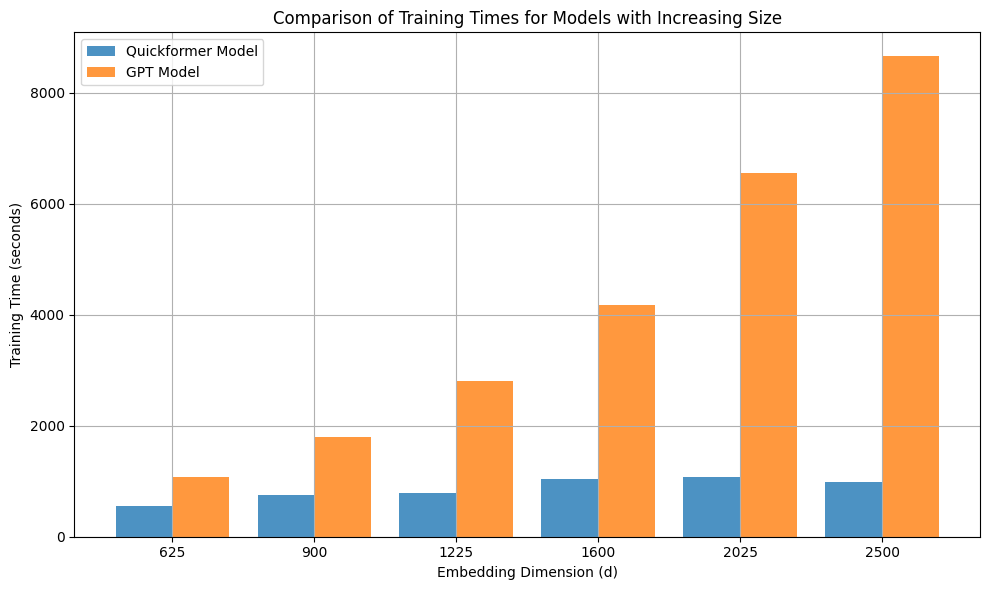

In [32]:
# Training time comparisons of both models
# Create a histogram plot
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(qf_model_embedding_dim))

# Plot the training times for Quickformer
plt.bar(index, qf_model_training_time, bar_width, label='Quickformer Model', alpha=0.8)

# Plot the training times for GPT
plt.bar(index + bar_width, gpt_model_training_time, bar_width, label='GPT Model', alpha=0.8)

plt.xlabel('Embedding Dimension (d)')
plt.ylabel('Training Time (seconds)')
plt.title('Comparison of Training Times for Models with Increasing Size')
plt.xticks(index + bar_width / 2, qf_model_embedding_dim)
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig('training_times_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Calculating carbon footprint
def calculate_co2_emissions(training_time_secs, power_consumption_watts, co2_emission_factor_kg_per_kwh):
    training_time_hours = training_time_secs / 3600

    # Step 1: Calculate total energy consumption in kilowatt-hours (kWh)
    total_energy_consumption_kwh = (training_time_hours * power_consumption_watts) / 1000

    # Step 2: Calculate CO2 emissions in kilograms
    co2_emissions_kg = total_energy_consumption_kwh * co2_emission_factor_kg_per_kwh

    return co2_emissions_kg

# Replace the following values with actual data for your setup
training_time_secs = 8660  # Training time in hours
power_consumption_watts = 220  # Power consumption of your hardware in watts
co2_emission_factor_kg_per_kwh = 0.389   # CO2 emission factor in kg per kilowatt-hour

co2_emissions = calculate_co2_emissions(training_time_secs, power_consumption_watts, co2_emission_factor_kg_per_kwh)
print(f"CO2 Emissions: {co2_emissions} kilograms")


CO2 Emissions: 0.20586744444444444 kilograms


In [10]:
carbon_footprint_qf = []
carbon_footprint_gpt = []
for idx in range(len(qf_model_training_time)):
    carbon_footprint_qf.append(calculate_co2_emissions(qf_model_training_time[idx], power_consumption_watts, co2_emission_factor_kg_per_kwh))
    carbon_footprint_gpt.append(calculate_co2_emissions(gpt_model_training_time[idx], power_consumption_watts, co2_emission_factor_kg_per_kwh))

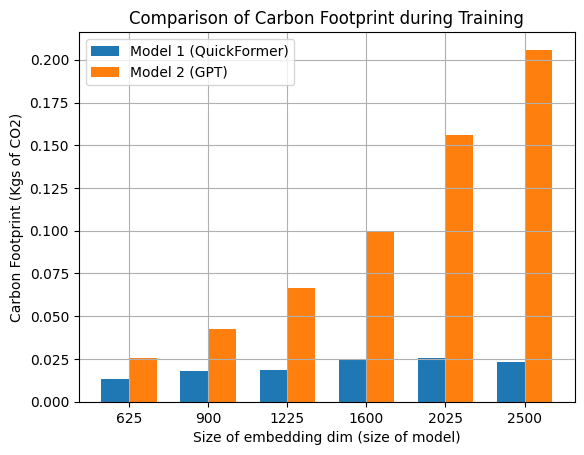

In [20]:
import matplotlib.pyplot as plt

def compare_carbon_footprint(carbon_footprint_qf, carbon_footprint_gpt):
    labels = ['Model 1 (QuickFormer)', 'Model 2 (GPT)']
    data = [carbon_footprint_qf, carbon_footprint_gpt]

    fig, ax = plt.subplots()
    width = 0.35  # Width of the bars

    # Create bar chart for the two models
    for i in range(len(data)):
        x_pos = [j + width*i for j in range(len(data[i]))]
        ax.bar(x_pos, data[i], width, label=labels[i])

    ax.set_ylabel('Carbon Footprint (Kgs of CO2)')
    ax.set_xlabel('Size of embedding dim (size of model)')
    ax.set_title('Comparison of Carbon Footprint during Training')
    ax.set_xticks([j + width/2 for j in range(len(data[0]))])
    ax.set_xticklabels(qf_model_embedding_dim) 
    ax.legend()
    plt.grid(True)
    # plt.savefig('carbon_footprint_comparison.png', dpi=300, bbox_inches='tight')    
    plt.show()


compare_carbon_footprint(carbon_footprint_qf, carbon_footprint_gpt)
